In [1]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import re

df  = pd.read_pickle(f"{root_dir}/results/results.pkl")

df.head()

,_runtime,_step,_timestamp,_wandb,pass@1,data.path,trainer.wandb,data.prompt_key,data.response_key,data.data_source_key,data.reward_model_key,run_name,run_id
0,0.829250,0.0,1.742278e+09,{'runtime': 0},0.070,/var/lib/condor/execute/slot1/dir_1591738/lift...,True,prompt,responses,data_source,reward_model,flowing-cosmos-1,jeuvl04f
1,0.845526,0.0,1.742278e+09,{'runtime': 0},0.035,/var/lib/condor/execute/slot1/dir_1591738/lift...,True,prompt,responses,data_source,reward_model,eager-waterfall-2,or3c7irw
2,0.866946,0.0,1.742278e+09,{'runtime': 0},0.000,/var/lib/condor/execute/slot1/dir_1591738/lift...,True,prompt,responses,data_source,reward_model,brisk-meadow-3,iotsoc6z
3,0.853680,0.0,1.742279e+09,{'runtime': 0},0.125,/var/lib/condor/execute/slot1/dir_1591738/lift...,True,prompt,responses,data_source,reward_model,dazzling-elevator-4,7izicvj6
4,0.833733,0.0,1.742279e+09,{'runtime': 0},0.110,/var/lib/condor/execute/slot1/dir_1591738/lift...,True,prompt,responses,data_source,reward_model,sage-pyramid-5,9v67ccal


In [2]:
# Extract model name, shot count, and dataset from all paths
def extract_info(path):
    pattern = r'/results/(\w+)/(.+?)_(\d+)_shot_gen_test\.parquet'
    match = re.search(pattern, path)
    
    if match:
        dataset = match.group(1)
        model_name = match.group(2)
        # Get the last part of the model path if it contains slashes
        if '/' in model_name:
            model_name = model_name.split('/')[-1]
        shot = int(match.group(3))
        return dataset, model_name, shot
    else:
        return None, None, None

# Apply the extraction function to create new columns
df['dataset'], df['model'], df['shot'] = zip(*df['data.path'].apply(extract_info))

# Display the dataframe with new columns
df[['dataset', 'model', 'shot', 'pass@1']].head()


,dataset,model,shot,pass@1
0,blobs,Qwen2.5-3B-Instruct,10,0.070
1,blobs,DeepSeek-R1-Distill-Qwen-1.5B,10,0.035
2,blobs,DeepSeek-R1-Distill-Qwen-7B,10,0.000
3,blobs,Qwen2.5-3B-Instruct,50,0.125
4,blobs,DeepSeek-R1-Distill-Qwen-1.5B,50,0.110


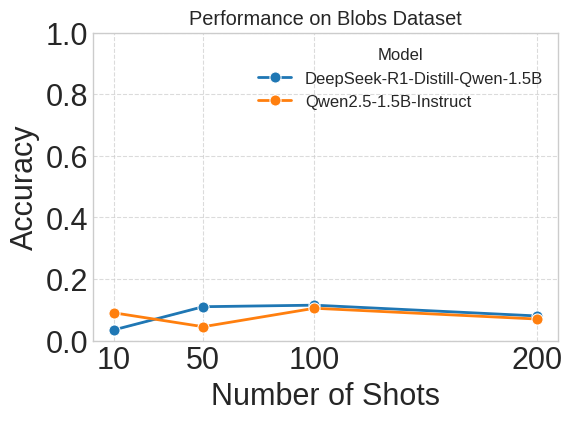

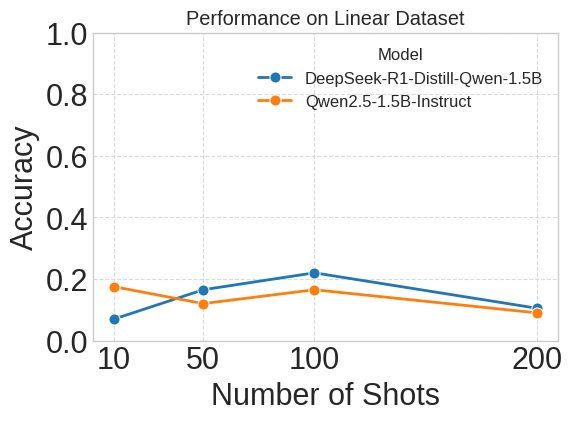

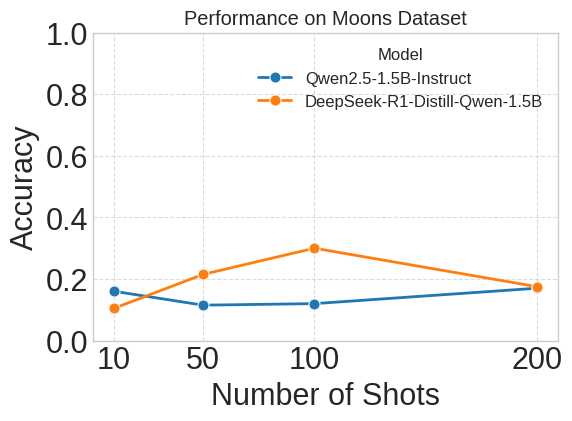

In [3]:
# Group by dataset and create a figure for each dataset
datasets = df['dataset'].unique()

# Set up the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['figure.figsize'] = (6, 4)
mpl.rcParams['font.size'] = 12
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend



# Models to include
models_to_include = ['DeepSeek-R1-Distill-Qwen-1.5B', 'Qwen2.5-1.5B-Instruct']

for dataset in datasets:
    # Filter data for this dataset and only include specified models
    dataset_df = df[(df['dataset'] == dataset) & (df['model'].isin(models_to_include))]
    
    # Create a new figure
    plt.figure()
    
    # Create line plot
    sns.lineplot(
        data=dataset_df,
        x='shot',
        y='pass@1',
        hue='model',
        marker='o',
        markersize=8,
        linewidth=2
    )
    
    # Add labels and title
    plt.xlabel('Number of Shots', fontsize=22)
    plt.ylabel('Accuracy', fontsize=22)
    plt.title(f'Performance on {dataset.capitalize()} Dataset')
    
    # Improve the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Model', bbox_to_anchor=(1, 1))
    
    # Set y-axis limits to start from 0
    plt.ylim(0, max(1.0, dataset_df['pass@1'].max() * 1.1))
    
    # Add x-ticks at each shot value
    plt.xticks(sorted(dataset_df['shot'].unique()))

    plt.show()


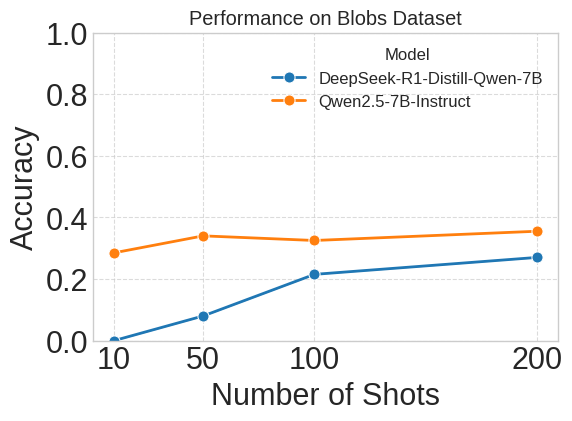

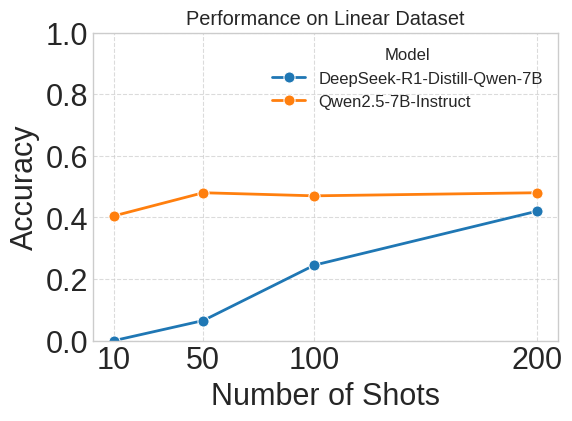

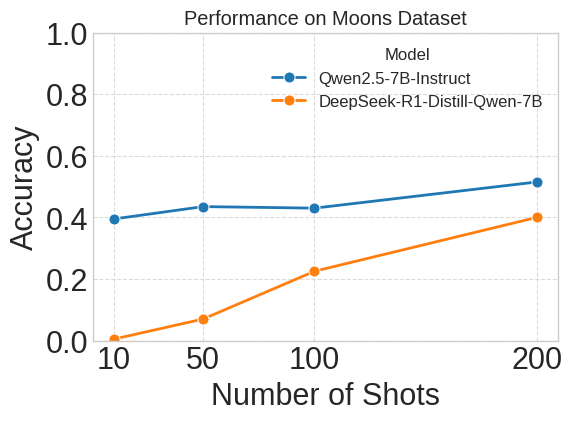

In [4]:
# Group by dataset and create a figure for each dataset
datasets = df['dataset'].unique()

# Set up the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['figure.figsize'] = (6, 4)
mpl.rcParams['font.size'] = 12
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend



# Models to include
models_to_include = ['DeepSeek-R1-Distill-Qwen-7B', 'Qwen2.5-7B-Instruct']

for dataset in datasets:
    # Filter data for this dataset and only include specified models
    dataset_df = df[(df['dataset'] == dataset) & (df['model'].isin(models_to_include))]
    
    # Create a new figure
    plt.figure()
    
    # Create line plot
    sns.lineplot(
        data=dataset_df,
        x='shot',
        y='pass@1',
        hue='model',
        marker='o',
        markersize=8,
        linewidth=2
    )
    
    # Add labels and title
    plt.xlabel('Number of Shots', fontsize=22)
    plt.ylabel('Accuracy', fontsize=22)
    plt.title(f'Performance on {dataset.capitalize()} Dataset')
    
    # Improve the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Model', bbox_to_anchor=(1, 1))
    
    # Set y-axis limits to start from 0
    plt.ylim(0, max(1.0, dataset_df['pass@1'].max() * 1.1))
    
    # Add x-ticks at each shot value
    plt.xticks(sorted(dataset_df['shot'].unique()))

    plt.show()


In [5]:
print(" <|im_start|>system\nYou are a helpful assistant. You first thinks about the reasoning process in the mind and then provides the user with the answer.<|im_end|>\n\n        <|im_start|>user\n The dataset has \
3 classes: [0, 1, 2]. We first provide you with some examples of how to classify data points.\nFeatures: -2.185, 8.884, Label: 0\nFeatures: -4.547, 8.006, Label: 0\nFeatures: 4.396, 2.937, Label: 1\nFeatures: -6.171, -6.647, Label: 2\nFea\
tures: -0.864, 8.765, Label: 0\nFeatures: -1.871, 7.353, Label: 0\nFeatures: -5.267, -5.983, Label: 2\nFeatures: 5.348, 2.930, Label: 1\nFeatures: -3.349, 8.415, Label: 0\nFeatures: -5.563, -6.998, Label: 2\nFeatures: -2.495, 8.990, Label\
: 0\nFeatures: 4.668, 1.964, Label: 1\nFeatures: -7.018, -8.104, Label: 2\nFeatures: -1.472, 8.504, Label: 0\nFeatures: -5.583, -6.903, Label: 2\nFeatures: 7.167, 1.442, Label: 1\nFeatures: 4.926, 2.308, Label: 1\nFeatures: -3.054, 9.125,\
 Label: 0\nFeatures: -6.126, -6.499, Label: 2\nFeatures: -2.988, 8.829, Label: 0\nFeatures: -5.692, -4.291, Label: 2\nFeatures: -7.698, -6.883, Label: 2\nFeatures: 5.426, 2.399, Label: 1\nFeatures: -6.711, -6.438, Label: 2\nFeatures: -1.8\
64, 10.383, Label: 0\nFeatures: -3.156, 7.933, Label: 0\nFeatures: -7.252, -5.791, Label: 2\nFeatures: 4.342, 3.349, Label: 1\nFeatures: -2.973, 8.549, Label: 0\nFeatures: 2.646, 2.347, Label: 1\nFeatures: -8.495, -5.715, Label: 2\nFeatur\
es: -2.758, 9.986, Label: 0\nFeatures: -7.785, -7.534, Label: 2\nFeatures: 4.773, 1.273, Label: 1\nFeatures: 5.248, 2.160, Label: 1\nFeatures: -4.806, -7.799, Label: 2\nFeatures: 5.829, 0.746, Label: 1\nFeatures: -1.884, 8.157, Label: 0\n\
Features: -5.240, -6.138, Label: 2\nFeatures: 5.163, 1.399, Label: 1\nFeatures: 4.674, 1.203, Label: 1\nFeatures: 5.576, 3.245, Label: 1\nFeatures: -2.438, 8.537, Label: 0\nFeatures: -4.428, 8.988, Label: 0\nFeatures: 4.014, 2.369, Label:\
 1\nFeatures: -1.895, 9.772, Label: 0\nFeatures: -6.959, -6.428, Label: 2\nFeatures: -2.439, 8.629, Label: 0\nFeatures: -2.485, 9.512, Label: 0\nFeatures: 4.602, 3.076, Label: 1\n Given the data point with features 5.426, 2.399, classify \
it into one of the possible classes. Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer>1</answer>.<|im_end|>\n<|im_start|>assistant\nLet me solve this step by step.\n<thin\
k>\n        ")

 <|im_start|>system
You are a helpful assistant. You first thinks about the reasoning process in the mind and then provides the user with the answer.<|im_end|>

        <|im_start|>user
 The dataset has 3 classes: [0, 1, 2]. We first provide you with some examples of how to classify data points.
Features: -2.185, 8.884, Label: 0
Features: -4.547, 8.006, Label: 0
Features: 4.396, 2.937, Label: 1
Features: -6.171, -6.647, Label: 2
Features: -0.864, 8.765, Label: 0
Features: -1.871, 7.353, Label: 0
Features: -5.267, -5.983, Label: 2
Features: 5.348, 2.930, Label: 1
Features: -3.349, 8.415, Label: 0
Features: -5.563, -6.998, Label: 2
Features: -2.495, 8.990, Label: 0
Features: 4.668, 1.964, Label: 1
Features: -7.018, -8.104, Label: 2
Features: -1.472, 8.504, Label: 0
Features: -5.583, -6.903, Label: 2
Features: 7.167, 1.442, Label: 1
Features: 4.926, 2.308, Label: 1
Features: -3.054, 9.125, Label: 0
Features: -6.126, -6.499, Label: 2
Features: -2.988, 8.829, Label: 0
Features: -5.692, -4.2

python -m verl.trainer.main_ppo     algorithm.adv_estimator=grpo     data.train_files=/var/lib/condor/execute/slot2/dir_3471884/liftr/datasets/blobs/10_shot/qwen-instruct/train.parquet     data.val_files=/var/lib/condor/execute/slot2/dir_3471884/liftr/datasets/blobs/10_shot/qwen-instruct/test.parquet     data.train_batch_size=16     data.val_batch_size=640     data.max_prompt_length=467     data.max_response_length=934     actor_rollout_ref.model.path=Qwen/Qwen2.5-3B-Ins\
truct     actor_rollout_ref.actor.optim.lr=1e-5     actor_rollout_ref.model.use_remove_padding=True     actor_rollout_ref.actor.ppo_mini_batch_size=64     actor_rollout_ref.actor.ppo_micro_batch_size=4     actor_rollout_ref.actor.use_kl_l\
oss=True     actor_rollout_ref.actor.kl_loss_coef=0.001     actor_rollout_ref.actor.kl_loss_type=low_var_kl     actor_rollout_ref.model.enable_gradient_checkpointing=True     actor_rollout_ref.actor.fsdp_config.param_offload=False     act\
or_rollout_ref.actor.fsdp_config.grad_offload=False     actor_rollout_ref.actor.fsdp_config.optimizer_offload=False     actor_rollout_ref.rollout.log_prob_micro_batch_size=4     actor_rollout_ref.rollout.tensor_model_parallel_size=2     a\
ctor_rollout_ref.rollout.name=vllm     actor_rollout_ref.rollout.gpu_memory_utilization=0.4     actor_rollout_ref.rollout.n=5     actor_rollout_ref.ref.log_prob_micro_batch_size=2     actor_rollout_ref.ref.fsdp_config.param_offload=True  \
   algorithm.kl_ctrl.kl_coef=0.01     trainer.critic_warmup=0     trainer.logger=['wandb']     +trainer.val_before_train=False     trainer.default_hdfs_dir=null     trainer.n_gpus_per_node=2     trainer.nnodes=1     trainer.save_freq=10  \
   trainer.test_freq=10     trainer.project_name=TinyZero     trainer.experiment_name=Qwen_Qwen2.5-3B-Instruct_blobs_10_shot_qwen-instruct_reslen_934     trainer.total_epochs=15 2>&1 | tee verl_demo

In [6]:
import re

In [14]:
solution_str = "<answer></answer><answer>\n1\n</answer><|im_end|>"

In [15]:
response_extract = re.search(r'<answer>(.*?)</answer>', solution_str, re.DOTALL)
if response_extract is None:
    # Try to find the last occurrence if there are multiple answer tags
    all_matches = list(re.finditer(r'<answer>(.*?)</answer>', solution_str, re.DOTALL))
    if all_matches:
        response_extract = all_matches[-1]  # Get the last match

In [16]:
response_extract

<re.Match object; span=(0, 17), match='<answer></answer>'>

In [17]:
response_extract is None

False